In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import yfinance as yf
import pandas_datareader as pdr

tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "UNH",
           "META","SNA","GS","XOM","NKE","BAX", "MOH","BRK-B", "MSFT"] 

df = yf.download(tickers, datetime(2022, 6, 17), datetime.now())
df = df['Adj Close']
df.tail()


[*********************100%***********************]  17 of 17 completed


,AAPL,AMD,BAX,BRK-B,DPZ,GME,GOOG,GS,META,MOH,MSFT,NFLX,NKE,SNA,SPY,UNH,XOM
Date,,,,,,,,,,,,,,,,,
2023-06-14,183.949997,127.330002,43.450001,335.899994,305.720001,25.700001,124.379997,338.420013,273.350006,275.489990,337.339996,440.859985,112.860001,271.779999,435.562042,457.979980,105.160004
2023-06-15,186.009995,124.239998,44.459999,339.820007,325.459991,24.840000,125.790001,339.739990,281.829987,283.809998,348.100006,445.269989,112.410004,274.269989,440.962006,465.890015,105.889999
2023-06-16,184.919998,120.080002,45.360001,338.309998,331.410004,24.559999,124.059998,338.309998,281.000000,278.019989,342.329987,431.959991,113.589996,273.869995,439.459991,458.489990,105.129997
2023-06-20,185.009995,118.930000,44.939999,338.670013,325.540009,24.580000,123.849998,330.720001,284.329987,278.809998,338.049988,434.700012,109.540001,273.019989,437.179993,469.390015,102.720001
2023-06-21,183.960007,112.110001,44.840000,338.609985,323.109985,24.430000,121.260002,325.070007,281.640015,283.000000,333.559998,424.450012,109.980003,272.880005,434.940002,476.750000,103.870003


In [ ]:
from statsmodels.tsa.stattools import adfuller
def stationarity(x, cutoff=0.01):
    pvalue = adfuller(x)[1]
    if pvalue < cutoff:
        print('The pvalue is: ', pvalue, x.name, ' is likely stationary')
    else:
        print('The pvalue is: ', pvalue, x.name, ' is likely non stationary')

In [123]:
df_corr = df.corr()
df_corr

,AAPL,AMD,BAX,BRK-B,DPZ,GME,GOOG,GS,META,MOH,MSFT,NFLX,NKE,SNA,SPY,UNH,XOM
AAPL,1.000000,0.867357,-0.283274,0.500009,-0.238470,0.148504,0.759986,-0.009821,0.830632,-0.276050,0.904140,0.428880,0.214299,0.548743,0.807092,-0.194651,0.087796
AMD,0.867357,1.000000,-0.314094,0.529400,-0.139324,0.150280,0.800144,-0.046492,0.881279,-0.553973,0.927987,0.441462,0.362108,0.545900,0.829042,-0.375724,0.021889
BAX,-0.283274,-0.314094,1.000000,-0.680420,0.742135,0.791951,0.193686,-0.363185,-0.467598,0.480202,-0.348719,-0.836545,-0.558648,-0.799163,-0.443972,0.634575,-0.778923
BRK-B,0.500009,0.529400,-0.680420,1.000000,-0.357161,-0.484652,0.147103,0.592339,0.553408,-0.394939,0.612181,0.870028,0.632923,0.932010,0.807853,-0.344467,0.740696
DPZ,-0.238470,-0.139324,0.742135,-0.357161,1.000000,0.715233,0.141052,0.047906,-0.413950,0.230265,-0.257818,-0.591473,-0.060900,-0.517251,-0.091026,0.541616,-0.492441
GME,0.148504,0.150280,0.791951,-0.484652,0.715233,1.000000,0.533077,-0.321501,-0.119447,0.255300,0.027577,-0.633236,-0.395932,-0.568948,-0.043808,0.504301,-0.746449
GOOG,0.759986,0.800144,0.193686,0.147103,0.141052,0.533077,1.000000,-0.363403,0.699785,-0.256533,0.791830,0.019984,0.003425,0.113897,0.562706,-0.084528,-0.391897
GS,-0.009821,-0.046492,-0.363185,0.592339,0.047906,-0.321501,-0.363403,1.000000,-0.183208,0.142004,-0.071306,0.529079,0.390281,0.572782,0.422656,0.111646,0.698036
META,0.830632,0.881279,-0.467598,0.553408,-0.413950,-0.119447,0.699785,-0.183208,1.000000,-0.638356,0.934922,0.523488,0.414519,0.610709,0.735354,-0.579704,0.140413
MOH,-0.276050,-0.553973,0.480202,-0.394939,0.230265,0.255300,-0.256533,0.142004,-0.638356,1.000000,-0.481268,-0.344688,-0.569282,-0.404995,-0.379677,0.788919,-0.179373


<h3><li> Select higher correletion stocks </li></h3>

<Axes: >

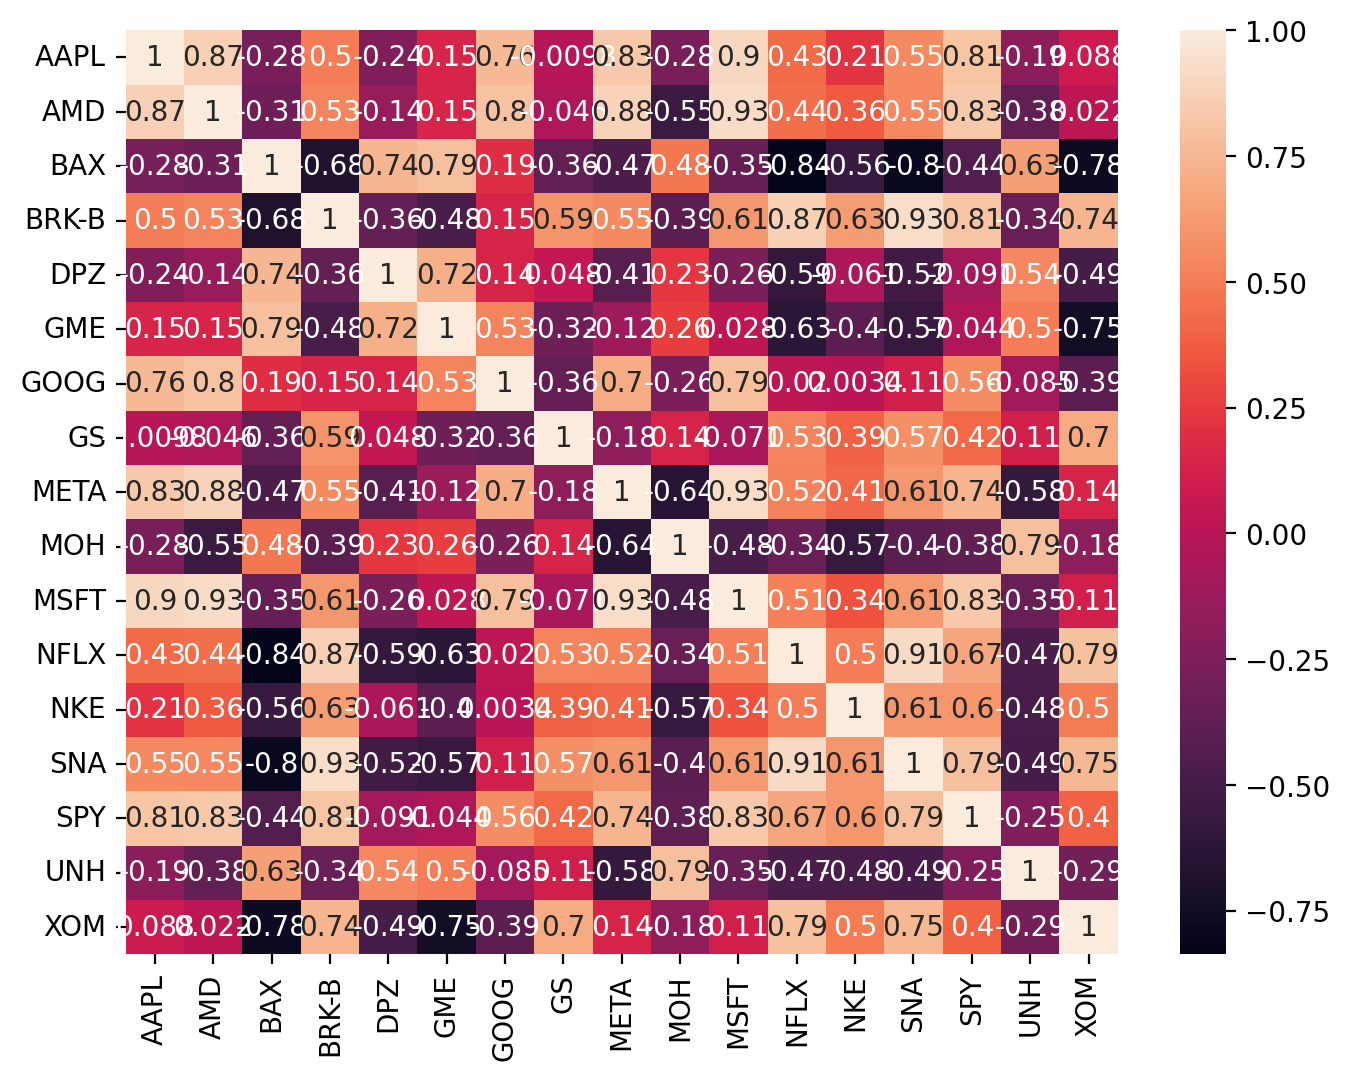

In [124]:
import seaborn as sn

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 200
sn.heatmap( df_corr, annot= True )

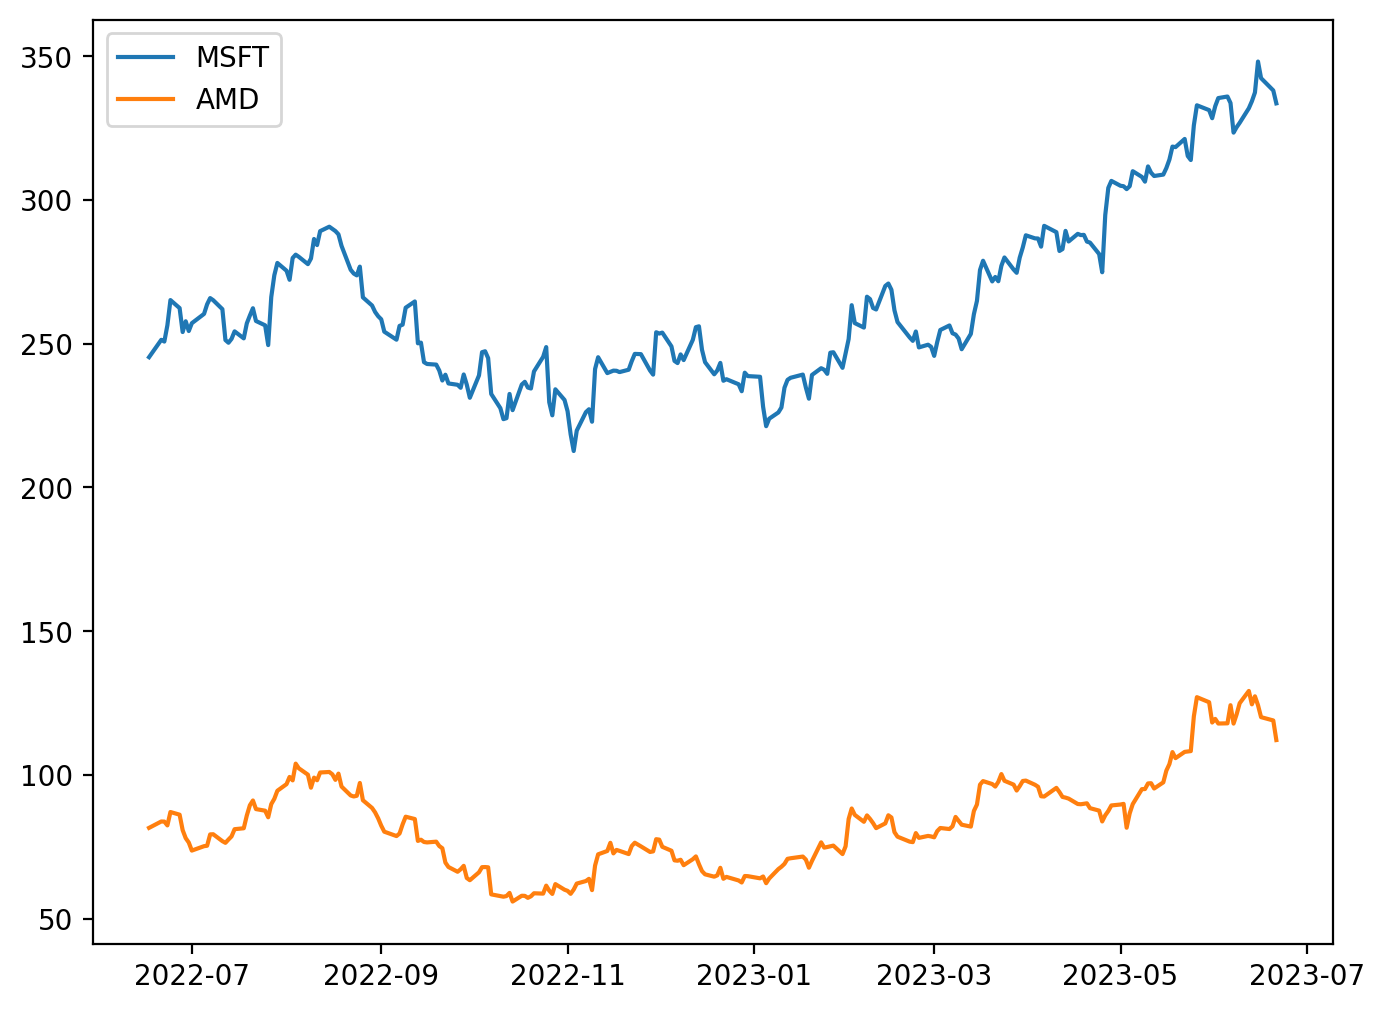

In [125]:
MSFT = df['MSFT']
AMD = df['AMD']
plt.plot(MSFT, label = 'MSFT')
plt.plot(AMD, label = 'AMD')
plt.legend()   

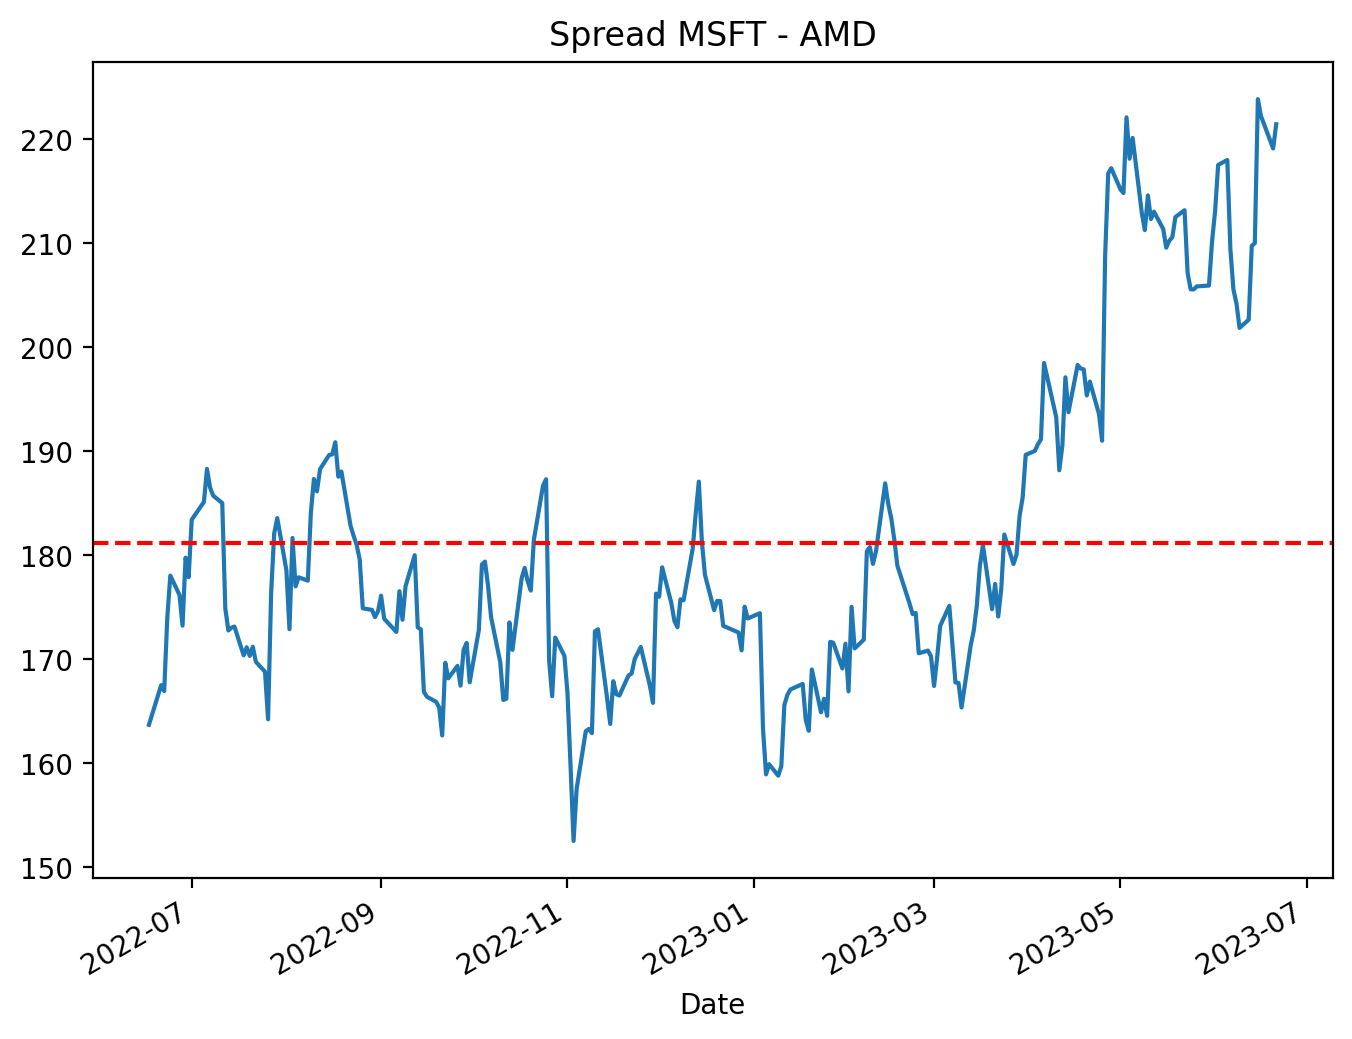

In [126]:
(MSFT - AMD).plot()
plt.title('Spread MSFT - AMD')
plt.axhline((MSFT - AMD).mean(), color='red', linestyle='--')

<h3><li> Not Cointegrated </li></h3>

<h1>Cointegration test</h1>

In [127]:
import statsmodels as sm
from statsmodels.tsa.stattools import coint

coint( MSFT, AMD)

(-3.11443491815611,
 0.0854402231348963,
 array([-3.94042787, -3.36048387, -3.06132299]))

In [128]:
score, pvalue, _ = coint( MSFT, AMD)
print (pvalue)


0.0854402231348963


In [129]:
def cointegration(pvalue):

    if pvalue < 0.05:
        print('pvalue is: ', pvalue, 'Likely Cointegrated')    
    else:
        print('pvalue is: ', pvalue, 'Likely not Cointegrated')

In [130]:
cointegration(pvalue)

pvalue is:  0.0854402231348963 Likely not Cointegrated


In [131]:
BRKB = df['BRK-B']
SNA = df['SNA']
AAPL = df['AAPL']
coint(MSFT, AAPL)
score, pvalue, _ = coint(BRKB, SNA)
print('pvalue is: ', pvalue )
cointegration(pvalue)


pvalue is:  0.022472282621864275
pvalue is:  0.022472282621864275 Likely Cointegrated


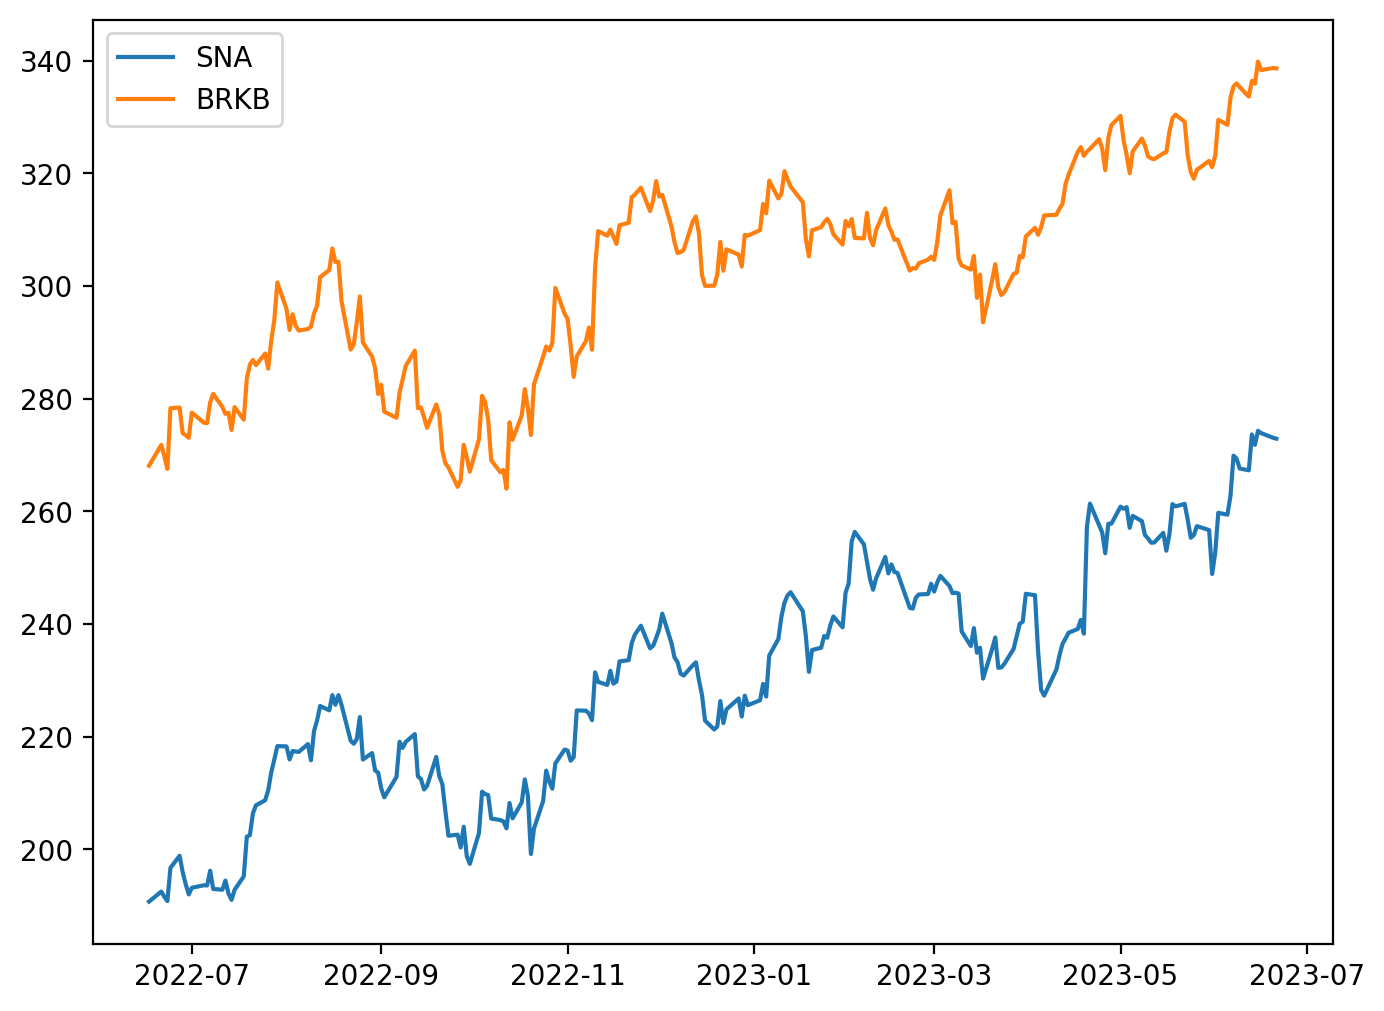

In [132]:
plt.plot(SNA, label = 'SNA')
plt.plot(BRKB, label = 'BRKB')
plt.legend()   

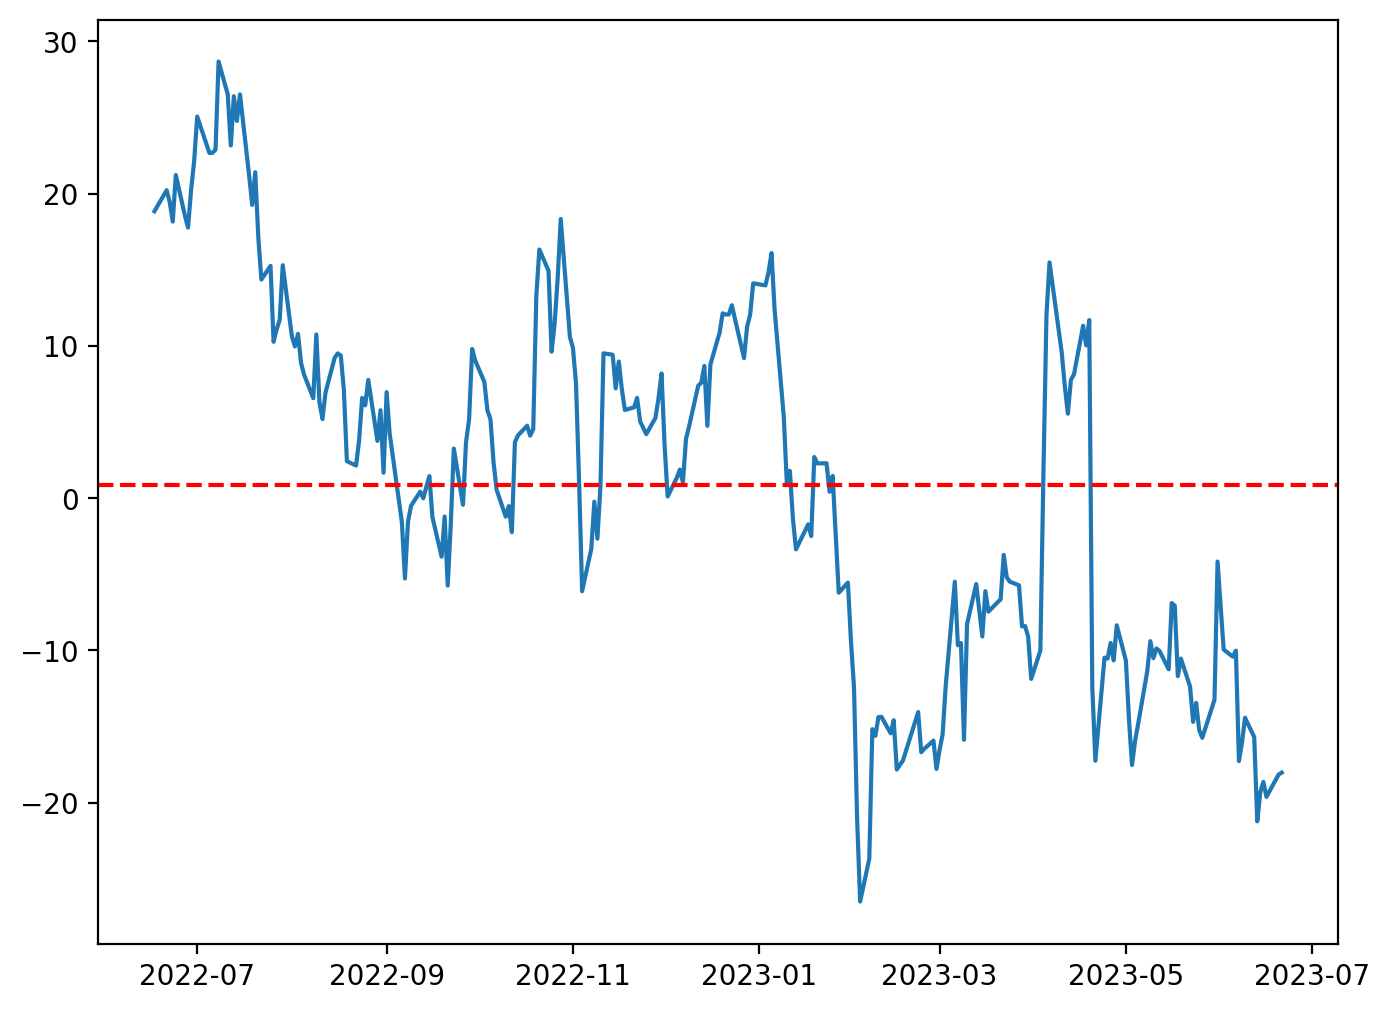

In [145]:
#spread
import statsmodels.api as sm
model = sm.OLS(BRKB,SNA)
result = model.fit()
Beta = result.params 
spread = (BRKB - SNA*1.306933)
plt.plot(spread)
plt.axhline((BRKB - SNA*1.306933).mean(), color='red', linestyle='--')


In [146]:
BRKB.corr(SNA)
stationarity(spread)

The pvalue is:  0.09128118466104856 None  is likely non stationary


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


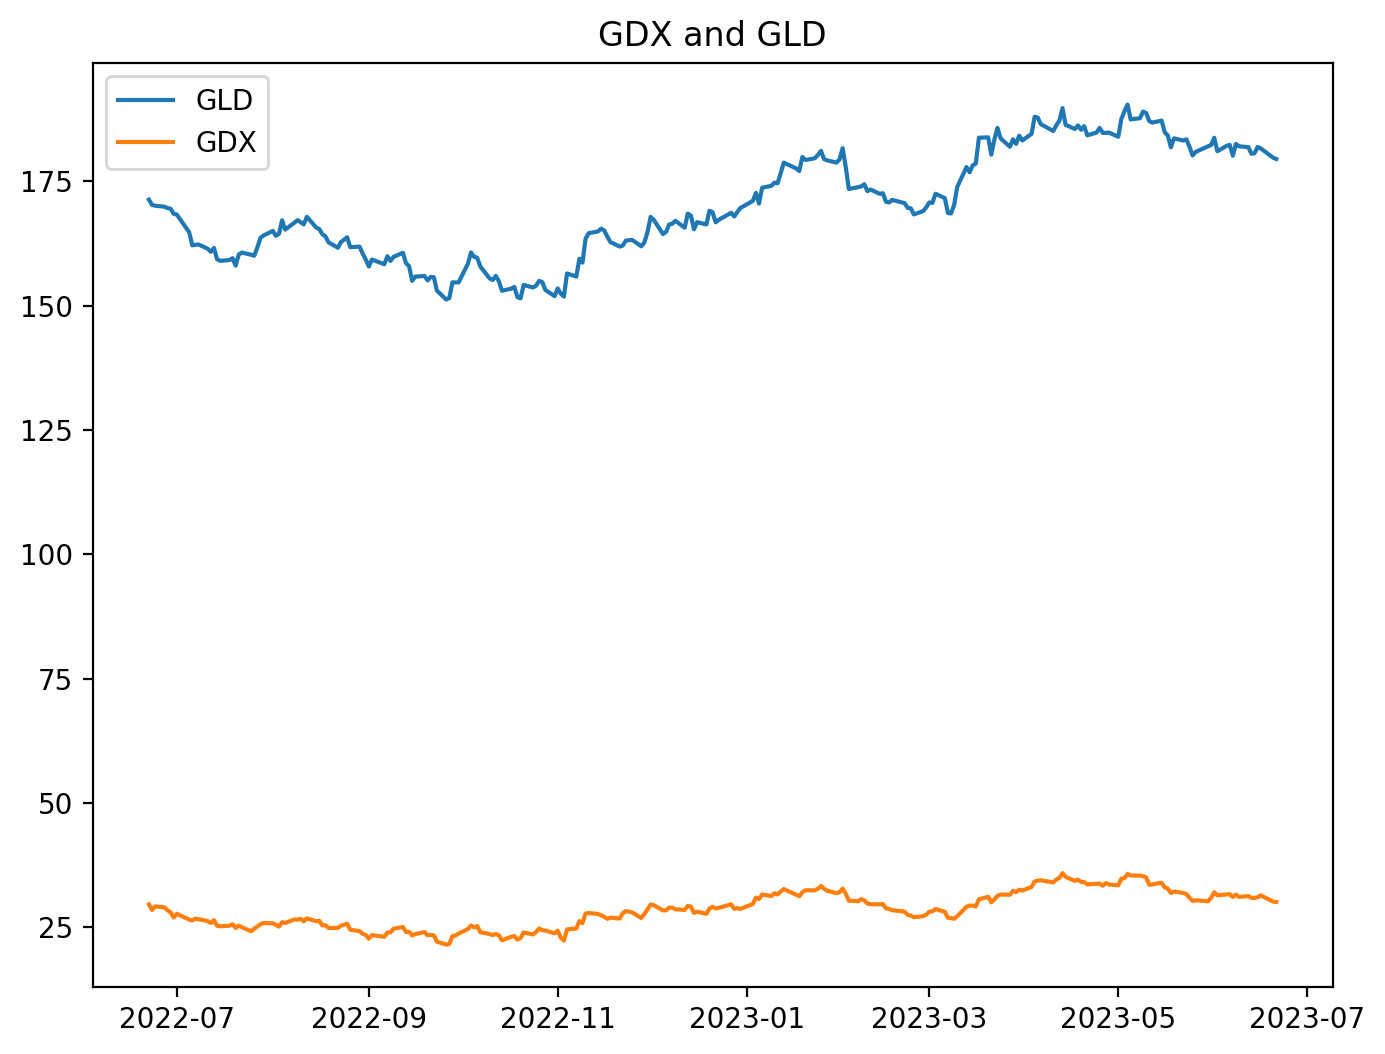

In [135]:
GLD = yf.download('GLD', datetime(2022, 6, 22) , datetime.now())['Adj Close']
GDX = yf.download('GDX', datetime(2022, 6, 22) , datetime.now())['Adj Close']
GoldPair = pd.merge(GLD, GDX, on='Date', suffixes=('_GLD', '_GDX'))
plt.plot(GoldPair)
plt.title('GDX and GLD')
plt.legend(['GLD','GDX'])

In [137]:

model = sm.OLS(GLD,GDX)
result = model.fit()
Beta = result.params 

SpreadGold = GoldPair.loc[:, 'Adj Close_GLD'] - (5.931226 * GoldPair.loc[:, 'Adj Close_GDX'])
SpreadGold
stationarity(SpreadGold)

The pvalue is:  0.35390603137118504 None  is likely non stationary


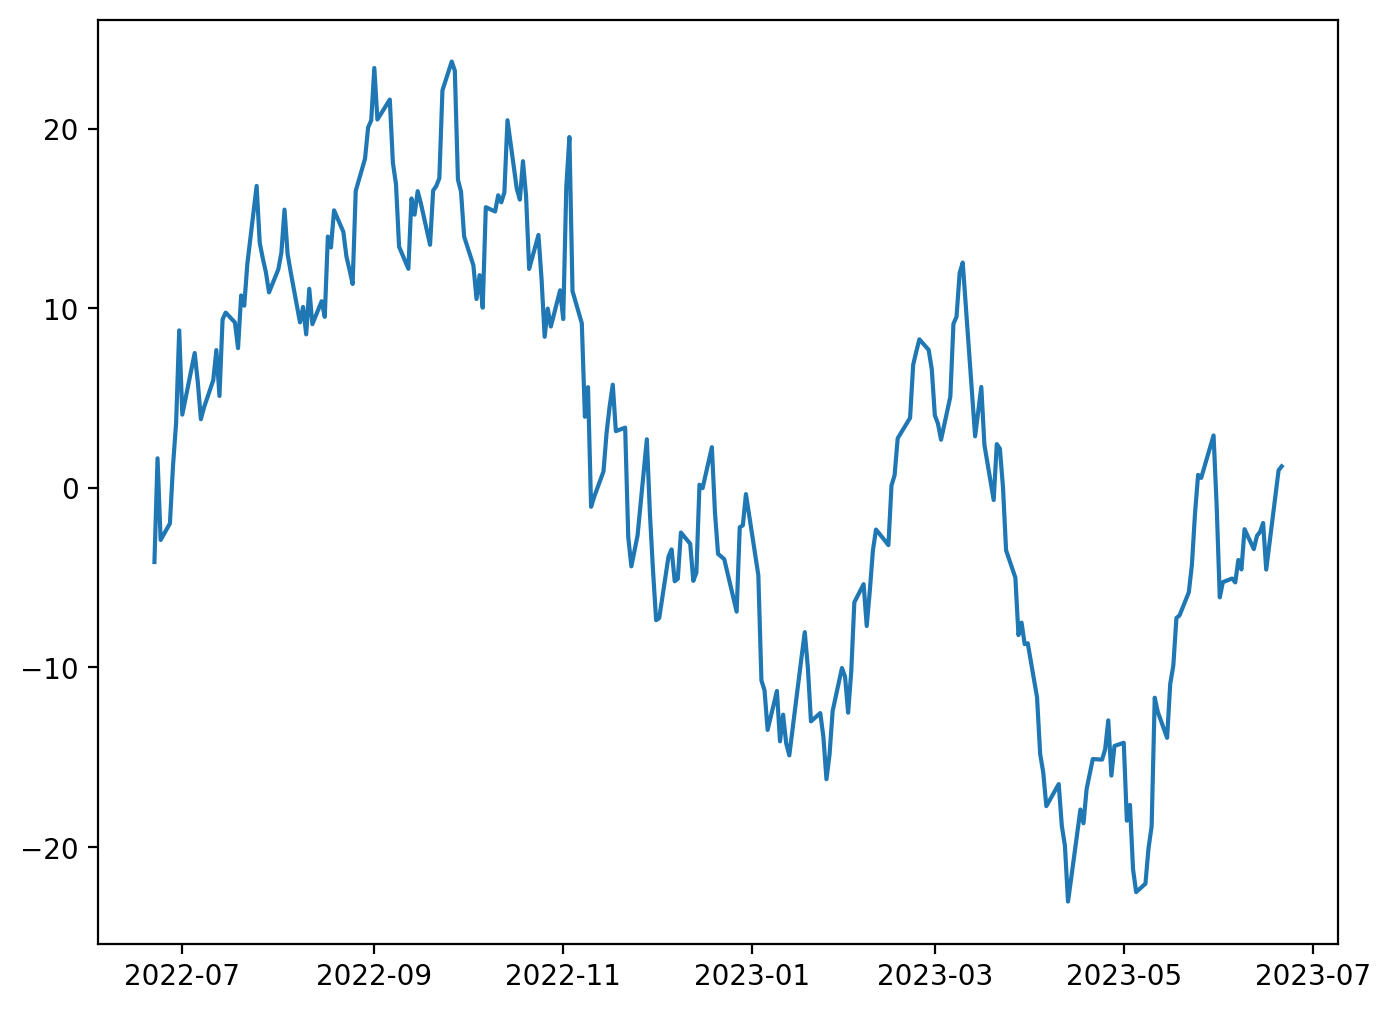

In [138]:
plt.plot(SpreadGold)

In [151]:
score, pvalue, _ = coint( GLD, GDX)
cointegration(pvalue)

GLD1 = GLD.pct_change()[1:]
stationarity(GLD1)



pvalue is:  0.2890337447444189 Likely not Cointegrated
The pvalue is:  2.581105943026704e-22 Adj Close  is likely stationary
